In [6]:
!git clone https://github.com/choiback/cognitive_environments

fatal: destination path 'cognitive_environments' already exists and is not an empty directory.


In [7]:
%cd /content

/content


# Utilizando o modelo da Azure para identificar se uma imagem é real ou fake

In [8]:
import requests
import os
import cv2
import numpy as np

from PIL import Image
from tqdm import tqdm
from collections import defaultdict
from imutils.video import VideoStream
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
from keras.models import model_from_json
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

## Parametros para acessar o modelo pré treinado na Azure com imagens Fakes e Reais.

Precisão do modelo: 87,5%

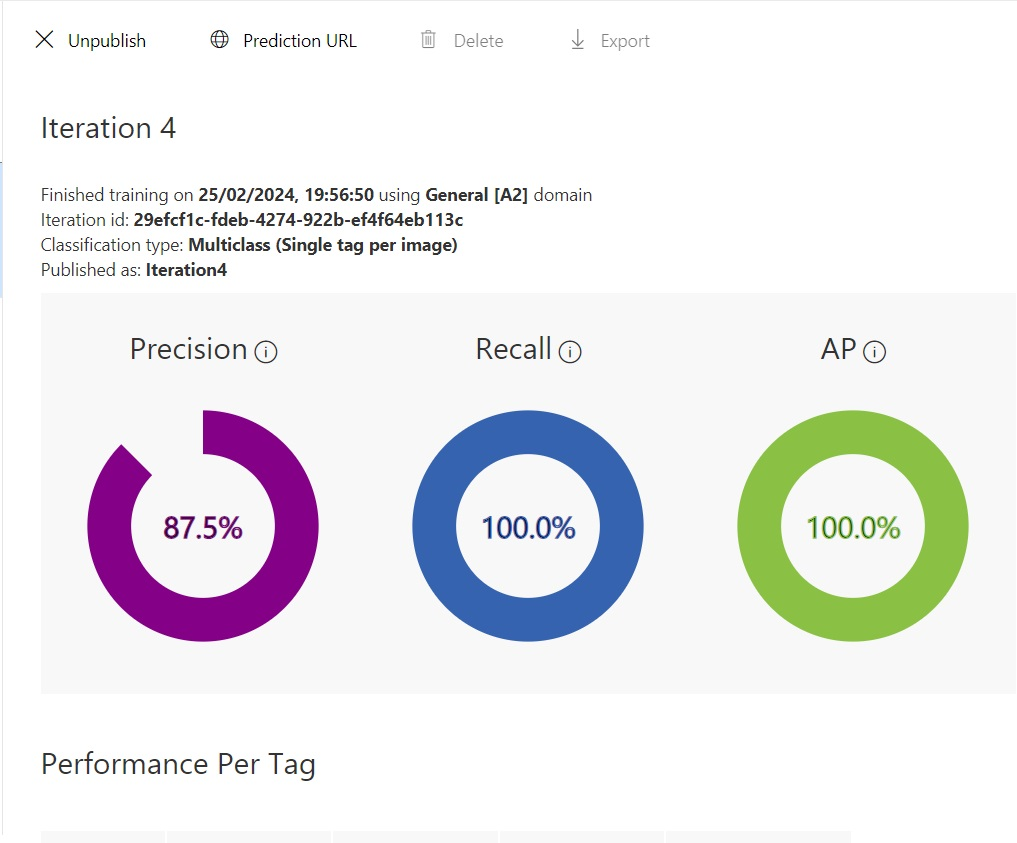

In [9]:
imagem = Image.open("cognitive_environments/metricas azure.jpg")
imagem

In [ ]:
endpoint = "https://customvisio-prediction.cognitiveservices.azure.com/customvision/v3.0/Prediction/72121b40-db9b-4103-807b-d37bf0ca8203/classify/iterations/Iteration4/image"

prediction_key = "chave_key"

headers = {
    "Prediction-key": prediction_key,
    "Content-Type": "aplication/octet-stram"
}


## Abrindo a imagem para verificar a prova de vida

In [ ]:
image_path = "cognitive_environments/identify face/IMG-20200428-WA0002.jpeg"

with open(image_path, "rb") as file:
  image_data = file.read()

## Retorno da requisição na Azure com a predição do modelo

In [ ]:
resp = requests.post(endpoint, headers=headers, data=image_data)
pred = resp.json()

if pred['predictions'][0]['probability'] > 0.75:
  print("Foi identificado prova de vida")
  print("Classificação: " + pred['predictions'][0]['tagName'])
  print("Probabilidade: " + str(pred['predictions'][0]['probability']))
else:
  print("Não foi identificado prova de vida")
  print("Classificação: " + pred['predictions'][0]['tagName'])
  print("Probabilidade: " + str(pred['predictions'][0]['probability']))

Foi identificado prova de vida
Classificação: real
Probabilidade: 0.9218969


# Utilizando o modelo da AWS para face match


In [ ]:
# Instalação da biblioteca Boto3, sempre obter a última versão
!pip install boto3

In [ ]:
import boto3
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image, ImageDraw

In [ ]:
ACCESS_ID = "ACCESS_ID"
ACCESS_KEY = "ACCESS_KEY"
region = "us-east-1"

## Imagem cadastro

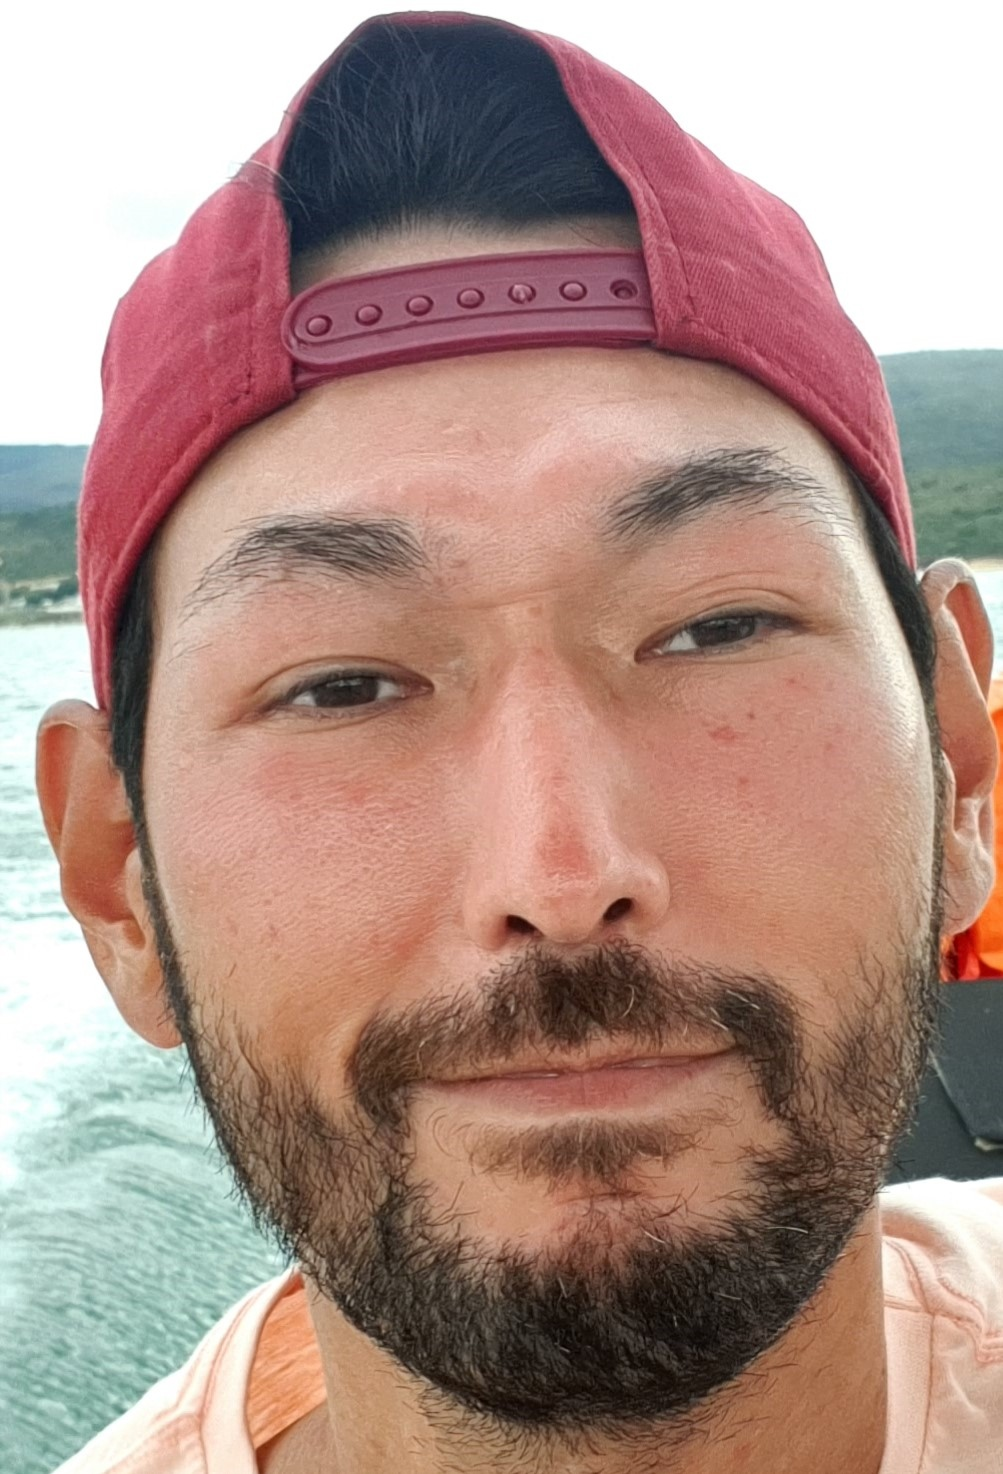

In [10]:
imagem = Image.open("cognitive_environments/Faces/choi2.jpg")
imagem

## Imagem Target

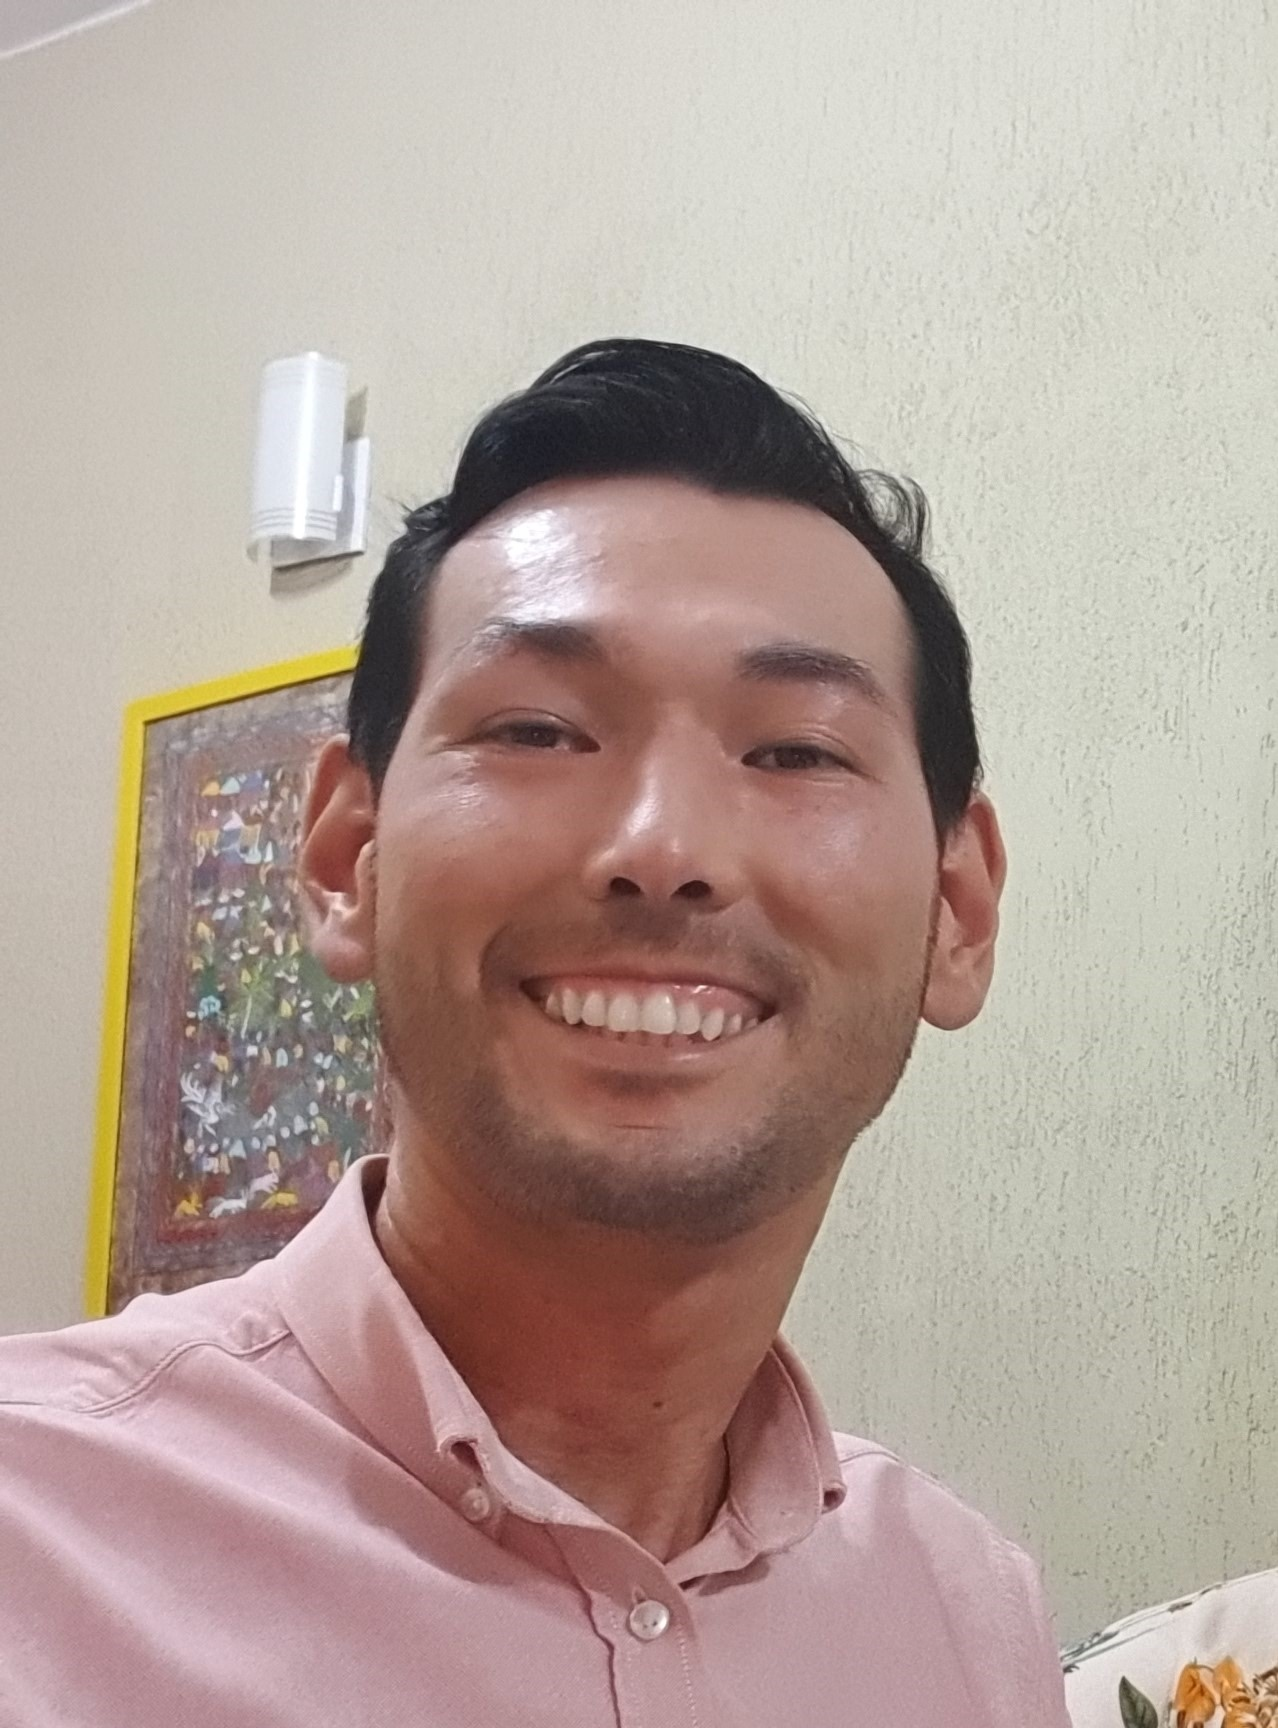

In [11]:
imagem = Image.open("cognitive_environments/identify face/20191231_233715_Edited.jpg")
imagem

## Requisição do serviço cognitivo na AWS para comparação de faces

In [ ]:
# imagem de comparação 1 (origem)
file_name_source = "cognitive_environments/Faces/choi2.jpg"

# imagem de comparação 2 (alvo)
file_name_target = "cognitive_environments/identify face/20191231_233715_Edited.jpg"

# convertendo a imagem de origem no formato binário
with open(file_name_source, "rb") as file:
  img_file = file.read()
  bytes_file_source = bytearray(img_file)

# convertendo a imagem alvo no formato binário
with open(file_name_target, "rb") as file:
  img_file = file.read()
  bytes_file_target = bytearray(img_file)

# abrindo a sessão
session = boto3.Session(aws_access_key_id=ACCESS_ID, aws_secret_access_key= ACCESS_KEY)

# criando o cliente
client = session.client("rekognition", region_name=region)

# realizando a requisição
response = client.compare_faces(
    SourceImage={'Bytes': bytes_file_source},
    TargetImage={'Bytes': bytes_file_target},
)


## Resposta do comparativo entre faces

In [ ]:
if response['FaceMatches'][0]['Similarity'] > 75:
  print("A pessoa da imagem a ser comparada corresponde a pessoa do cadastro")
  print(f"Rosto similar em :{response['FaceMatches'][0]['Similarity']}%")
else:
  print("A pessoa da imagem a ser comparada NÃO corresponde a pessoa do cadastro")
  print(f"Rosto similar em :{response['FaceMatches'][0]['Similarity']}%")

A pessoa da imagem a ser comparada corresponde a pessoa do cadastro
Rosto similar em :99.98584747314453%
